In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqr

pd.set_option('display.max_columns', None)
df = pd.read_csv('/Users/kalel/Documents/Python Projects/Data Science/Superhero Data Cleaning & Analysis/data.csv')

df.head(3)

,id,name,powerstats__intelligence,powerstats__strength,powerstats__speed,powerstats__durability,powerstats__power,powerstats__combat,biography__full-name,biography__alter-egos,biography__aliases__001,biography__place-of-birth,biography__first-appearance,biography__publisher,biography__alignment,appearance__gender,appearance__race,appearance__height__001,appearance__height__002,appearance__weight__001,appearance__weight__002,appearance__eye-color,appearance__hair-color,work__occupation,work__base,connections__group-affiliation,connections__relatives,biography__aliases__002,biography__aliases__003,biography__aliases__004,biography__aliases__005,biography__aliases__006,biography__aliases__007,biography__aliases__008,biography__aliases__009,biography__aliases__010,biography__aliases__011,biography__aliases__012,biography__aliases__013,biography__aliases__014,biography__aliases__015,biography__aliases__016,biography__aliases__017,biography__aliases__018,biography__aliases__019,biography__aliases__020
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good,Male,Human,6'8,203 cm,980 lb,441 kg,Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,Langdon Everett Caul,-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good,Male,Icthyo Sapien,6'3,191 cm,145 lb,65 kg,Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",Abraham Sapien,Langdon Caul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good,Male,Ungaran,6'1,185 cm,200 lb,90 kg,Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Cleaned columns
df = df.drop(columns=['appearance__height__002', 'appearance__weight__001', 'appearance__eye-color', 'appearance__hair-color', 'connections__relatives'], axis=1, errors='ignore')
df = df.drop(columns=df.columns[20:], axis=1, errors='ignore')
df = df.set_index(['id'])
df = df.rename(columns=lambda x: x.replace('biography__', '').replace('powerstats__','').replace('appearance__', '').replace('work__', ''))
df = df.rename(columns={'name':'Superhero Name', 'aliases__001':'Superhero Alias', 'full-name':'Birth Name', 'place-of-birth': 'Birth Place', 'height__001':'Height (ft)', 'weight__002':'Weight (kg)'})
df = df.rename(columns={col: ' '.join(col.split('-')) for col in df.columns})
df.columns = df.columns.str.title()
df.head(3)

,Superhero Name,Intelligence,Strength,Speed,Durability,Power,Combat,Birth Name,Alter Egos,Superhero Alias,Birth Place,First Appearance,Publisher,Alignment,Gender,Race,Height (Ft),Weight (Kg),Occupation
id,,,,,,,,,,,,,,,,,,,
1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good,Male,Human,6'8,441 kg,"Musician, adventurer, author; formerly talk sh..."
2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,Langdon Everett Caul,-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good,Male,Icthyo Sapien,6'3,65 kg,Paranormal Investigator
3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good,Male,Ungaran,6'1,90 kg,"Green Lantern, former history professor"


In [4]:
# Filling in Nan Values
df[['Intelligence','Strength','Speed','Durability', 'Power', 'Combat']] = df[['Intelligence','Strength','Speed','Durability', 'Power', 'Combat']].fillna(df[['Intelligence','Strength','Speed','Durability', 'Power', 'Combat']].median())
df[['Birth Name', 'Race', 'Publisher']] = df[['Birth Name', 'Race', 'Publisher']].fillna('Unknown')
df[['Alter Egos', 'Superhero Alias']] = df[['Superhero Alias', 'Alter Egos']].replace({'No alter egos found.':'None', '-':'None'})
df[['Birth Place', 'First Appearance', 'Alignment', 'Gender', 'Occupation']] = df[['Birth Place', 'First Appearance', 'Alignment', 'Gender', 'Occupation']].replace('-', 'Unknown')
df['Alignment'] = df['Alignment'].str.title()
df.loc[df['Publisher']=='Unknown']

# Standardized the race's values
slash_dash = df.loc[df['Race'].str.contains('/|-'), 'Race'].str.split('/|-').apply(lambda x: ', '.join([slash.strip() for slash in x]))
none_slash_dash = df.loc[~df['Race'].str.contains('/|-'), 'Race']
cleaned_race = pd.concat([slash_dash, none_slash_dash]).sort_index()
cleaned_race.count()
df['Race'] = cleaned_race

# Cleaned and standardized the height values
mask_digit = df['Height (Ft)'].astype(str).str.isdigit()
df.loc[mask_digit, 'Height (Ft)'] = df.loc[mask_digit, 'Height (Ft)'].astype(str)+'\'0'
mask_missing_inches = df['Height (Ft)'].astype(str).str.endswith('\'') & df['Height (Ft)'].str.count('\'')==1
df.loc[mask_missing_inches, 'Height (Ft)'] = df.loc[mask_missing_inches, 'Height (Ft)'].astype(str)+'0'
mask_over_inches = df['Height (Ft)'].str.count('\'')==2
df.loc[mask_over_inches, 'Height (Ft)'] = df.loc[mask_over_inches, 'Height (Ft)'].astype(str)+'x'
df.loc[mask_over_inches, 'Height (Ft)'] = df.loc[mask_over_inches, 'Height (Ft)'].str.replace('\'x','')
mask_string = (df['Height (Ft)'].astype(str).str.isalpha()) | (df['Height (Ft)'] == '-') | (df['Height (Ft)'].str.contains(','))
df.loc[mask_string, 'Height (Ft)'] = np.nan
height_split = df['Height (Ft)'].str.split('\'',expand=True)
height_split = height_split.rename(columns={0:'Ft', 1:'In'})
height_split = height_split.fillna(0)
height_split['Ft'] = height_split['Ft'].astype(int)
height_split['In'] = height_split['In'].astype(int)
height_split['Ft'] += height_split['In']//12
height_split['In'] = height_split['In'] % 12
df['Height (Ft)'] = height_split['Ft'].astype(str)+'\''+height_split['In'].astype(str)
df.loc[df['Height (Ft)'] == '0\'0', 'Height (Ft)'] = 'Unknown'

# Cleaned and standardized the weight values
mask_tons = df['Weight (Kg)'].str.contains('tons', na=False)
df.loc[mask_tons, 'Weight (Kg)'] = df.loc[mask_tons, 'Weight (Kg)'].apply( lambda x: min(float(str(x).replace('tons', '').replace(',', '').strip()) * 907.18, 1000)).astype(float)
mask_kg = df['Weight (Kg)'].str.contains('kg', case=False, na=False)
df.loc[mask_kg, 'Weight (Kg)'] = df.loc[mask_kg, 'Weight (Kg)'].str.replace('kg', '').str.strip().astype(float)
median_weight = df.loc[df['Weight (Kg)']!=0.0, 'Weight (Kg)'].median()
df.loc[df['Weight (Kg)']==0, 'Weight (Kg)'] = median_weight

df.head(3)

,Superhero Name,Intelligence,Strength,Speed,Durability,Power,Combat,Birth Name,Alter Egos,Superhero Alias,Birth Place,First Appearance,Publisher,Alignment,Gender,Race,Height (Ft),Weight (Kg),Occupation
id,,,,,,,,,,,,,,,,,,,
1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,Rick Jones,None,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,Male,Human,6'8,441.0,"Musician, adventurer, author; formerly talk sh..."
2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,Langdon Everett Caul,None,Unknown,Hellboy: Seed of Destruction (1993),Dark Horse Comics,Good,Male,Icthyo Sapien,6'3,65.0,Paranormal Investigator
3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,Unknown,Lagzia,None,Ungara,"Showcase #22 (October, 1959)",DC Comics,Good,Male,Ungaran,6'1,90.0,"Green Lantern, former history professor"


# **Q. Dataset Population, According to Race**

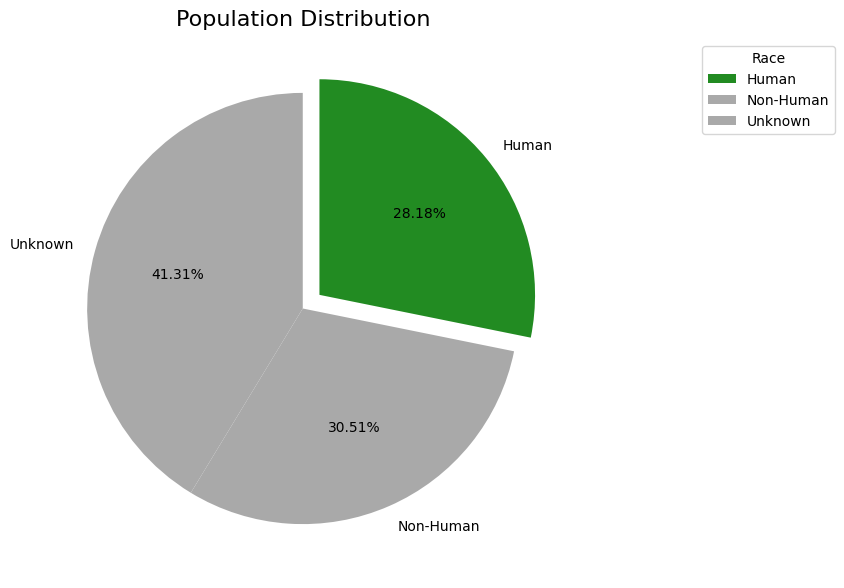

In [5]:
# Counts
race_population = df.loc[df['Race']=='Human']['Race'].value_counts()
race_population['Non-Human'] = df.loc[(df['Race']!='Human') & (df['Race'] != 'Unknown')]['Race'].value_counts().sum()
race_population['Unknown'] = df.loc[(df['Race']!='Human') & (df['Race'] == 'Unknown')]['Race'].value_counts().sum()
race_population.sort_values(ascending=True)

# Visualizing
pie_color = ['#228B22','#A9A9A9','#A9A9A9']
explode = [0.1, 0, 0]
plt.figure(figsize=(7,7))
plt.title(
    'Population Distribution', 
    fontsize=16, 
    pad=10
)
plt.pie(
    race_population, 
    labels=race_population.index, 
    autopct='%1.2f%%', 
    colors = pie_color, 
    textprops={'fontsize': 10},
    explode=explode,
    counterclock=False,
    startangle=90
)
plt.legend(
    race_population.index,
    title='Race',
    loc='upper right',
    bbox_to_anchor=(1.5,1)
)
plt.show()

# **Q. Dataset Population of Non-Humans**

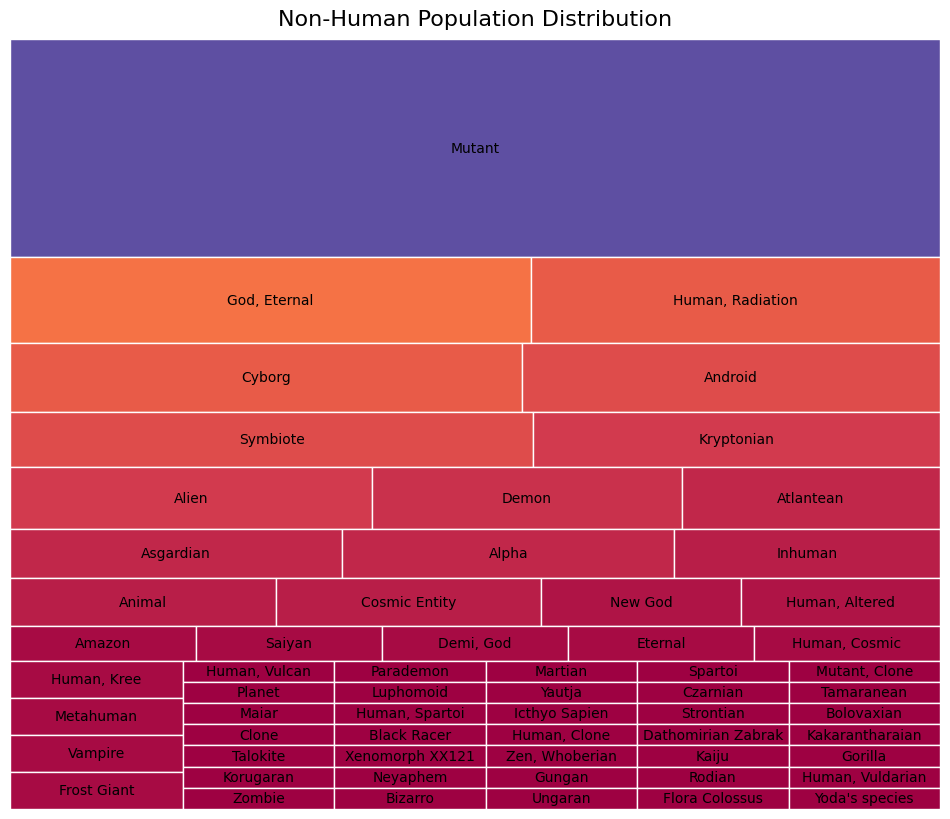

In [6]:
# Counts
each_non_human = df.loc[(df['Race'] != 'Human') & (df['Race'] != 'Unknown')]['Race'].value_counts()

# Visualization
plt.figure(figsize=(12, 10))
cmap = plt.colormaps['Spectral']
norm = plt.Normalize(vmin=min(each_non_human.values), vmax=max(each_non_human.values))
colors = [cmap(norm(val)) for val in each_non_human.values]
plt.title('Non-Human Population Distribution', fontsize=16, pad=10)
sqr.plot(
    sizes=each_non_human.values,
    label=each_non_human.index,
    text_kwargs={'fontsize':10, 'color':'black'},
    bar_kwargs={'edgecolor': 'white', 'linewidth': 1}, 
    norm_x=10, norm_y=50,
    color=colors,
)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

It is important to note that hybrid individuals, composed of two or more races, including those that are of the human race, are classified as non-human.

# **Q. Amount of Top Performing Human Characters per Feat**

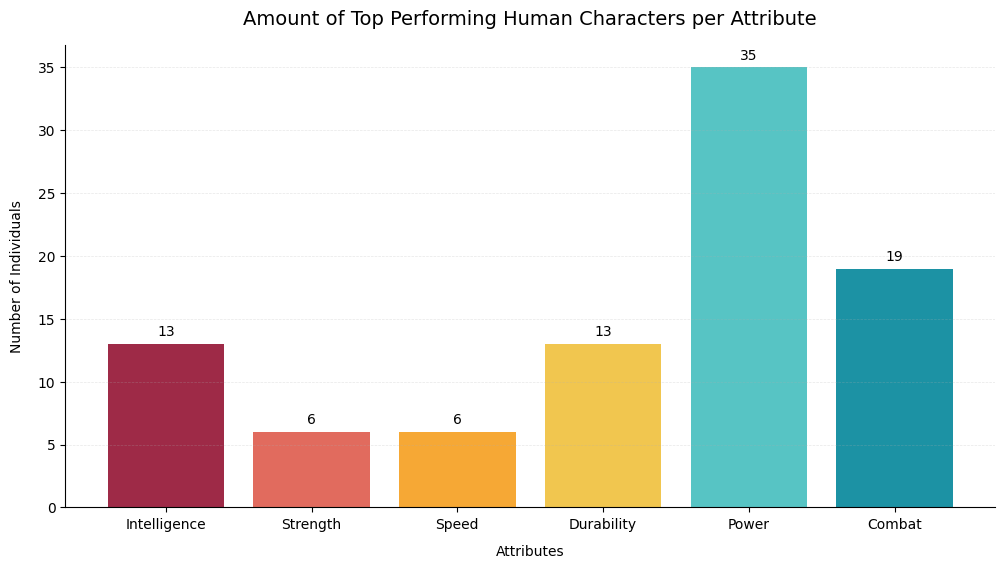

In [7]:
human_df = df[df['Race']=='Human']
feats = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
top_per_feat = pd.Series({feat: human_df.loc[(human_df[feat] == 100)].shape[0] for feat in feats})

fig,ax = plt.subplots(figsize=(12,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
attr_colors = ["#9e2a47", "#e16b5e", "#f6a835", "#f1c64f", "#57c4c4", "#1c92a4"]
plt.bar(
    top_per_feat.index,
    top_per_feat,
    color = attr_colors
)
plt.title(
    'Amount of Top Performing Human Characters per Attribute',
    fontsize=14,
    pad=15
)
plt.ylabel(
    'Number of Individuals',
    labelpad=10
)
plt.xlabel(
    'Attributes',
    labelpad=10
)
for i, (feat, count) in enumerate(top_per_feat.items()):
    plt.text(i, count+.4, str(count), ha='center', va='bottom')
plt.grid(
    axis='y',
    linestyle='--',
    linewidth=.5,
    alpha=.3
)
plt.show()

# **Q. Human Characters Attribute Score Distribution**

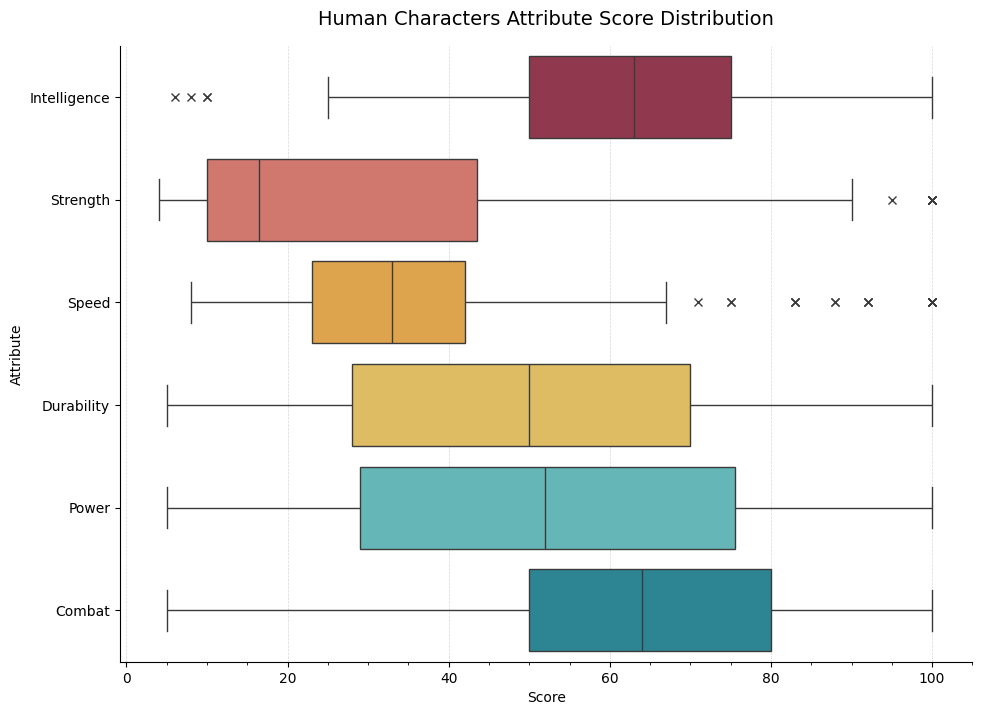

In [9]:
# Long format
melted = human_df[feats].melt(var_name='Attribute', value_name='Score')

# Visualization
fig, ax = plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.boxplot(
    data=melted,
    x='Score',
    y='Attribute',
    hue='Attribute',
    palette=attr_colors,
    flierprops=dict(
        marker='x',
    )
)
plt.title(
    'Human Characters Attribute Score Distribution',
    fontsize=14,
    pad=15
)
plt.minorticks_on()
plt.xticks(
    range(0,110,5),
    minor=True
)
plt.yticks(
    range(0),
    minor=True
)
plt.grid(
    axis='x',
    linestyle='--',
    linewidth=.5,
    alpha=.5
)
plt.show()

The box plot above illustrates the distribution of scores by characters of the human race across various attributes. While some characters are top performers, being human doesn't correlate to having superhuman abilities. This is evident in the score distribution as the majority score below 80 (considered moderately high). Scores range from low to medium in attributes like strength and speed, medium to above average in intelligence and combat, and generally center around the middle in durability and power.

# **Population vs  Top Performers**

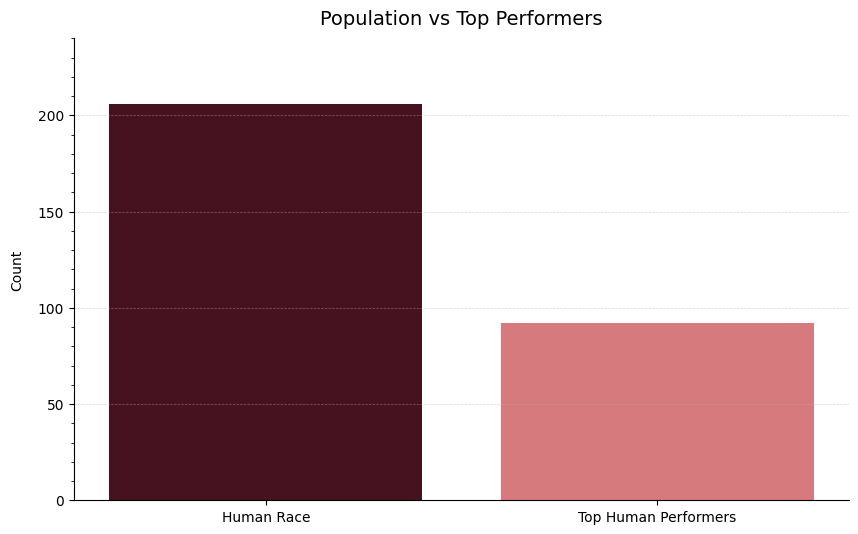

In [ ]:
# Counts
human_dist = human_df['Race'].value_counts()
human_dist.index = ['Human Race']
human_dist['Top Human Performers'] = top_per_feat.sum()

# Visualization
fig, ax = plt.subplots(figsize=(10,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.bar(
    human_dist.index,
    human_dist,
    color = ['#461220', '#D77A7D']
)
plt.title(
    'Population vs Top Performers',
    fontsize = 14,
    pad = 10
)
plt.ylabel(
    'Count',
    labelpad = 10
)
plt.minorticks_on()
plt.yticks(
    range(0,250,10),
    minor = True
)
plt.xticks(
    range(0),
    minor = True
)
plt.grid(
    which = 'major',
    axis = 'y',
    linestyle = '--',
    linewidth = .5,
    alpha = .5
)
plt.show()

The bar chart above shows the amount of top performers compared to the the overall human race population. Out of the 206 human characters, only 92 are top performers, which is only 44.66%. This suggests that while there are human characters that excel in certain attributes, it doesn't imply that the majority perform above average.